In [1]:
import numpy as np
import matplotlib.pyplot as plt

from k_means import KMeans
from GMM import GaussianMixtureModel

# Generating Sample Data

In [2]:
np.random.seed(42)

gaussian0 = np.random.normal(loc=0, scale=1, size=2000)
gaussian1 = np.random.normal(loc=4, scale=1, size=400)

X = np.hstack((gaussian0, gaussian1))
np.random.shuffle(X)

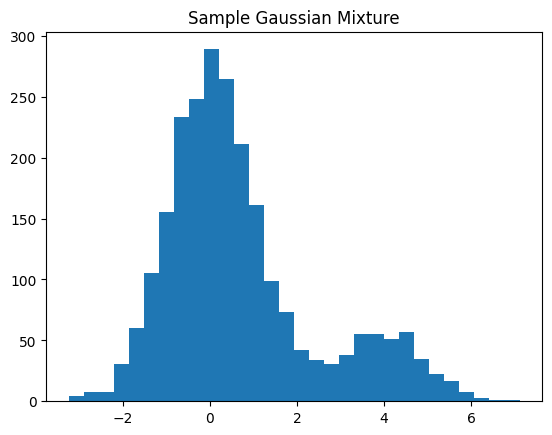

In [3]:
plt.hist(X, bins=30)
plt.title('Sample Gaussian Mixture')
plt.show()

# k-Means Clustering

In [4]:
np.random.seed(42)
k_clustering = KMeans(2)
k_clustering.fit(X, 1000)

k_preds = k_clustering.predict(X)
k_mean_0, k_mean_1 = k_clustering.centroids
print("Cluster means:")
print(f"0: {k_mean_0.item():.2f}")
print(f"1: {k_mean_1.item():.2f}")

Cluster means:
0: -0.03
1: 3.72


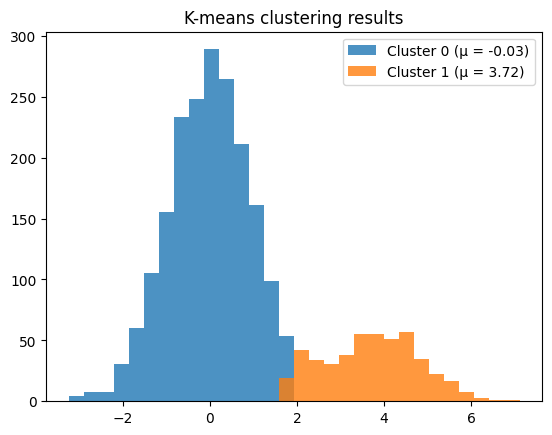

In [5]:
bins = np.linspace(np.min(X), np.max(X), 31)

plt.hist(X[k_preds == 0], bins = bins, label = f"Cluster 0 (μ = {k_mean_0.item():.2f})", alpha = 0.8)
plt.hist(X[k_preds == 1], bins = bins, label = f"Cluster 1 (μ = {k_mean_1.item():.2f})", alpha = 0.8)
plt.title("K-means clustering results")
plt.legend()
plt.show()

# Gaussian Mixture Model (GMM)

In [6]:
X_exp = np.expand_dims(X, axis=1)

GMM_clustering = GaussianMixtureModel(X_exp, 2)
GMM_clustering.fit(1000)
GMM_preds = GMM_clustering.predict()
GMM_mean_0, GMM_mean_1 = GMM_clustering.means
GMM_var_0, GMM_var_1 = GMM_clustering.cov
print("Cluster means and variances:")
print(f"0: Mean: {GMM_mean_0[0]:.2f}, Variance: {GMM_var_0:.2f}")
print(f"1: Mean: {GMM_mean_1[0]:.2f}, Variance: {GMM_var_1:.2f}")

Cluster means and variances:
0: Mean: 0.04, Variance: 0.97
1: Mean: 3.94, Variance: 0.97


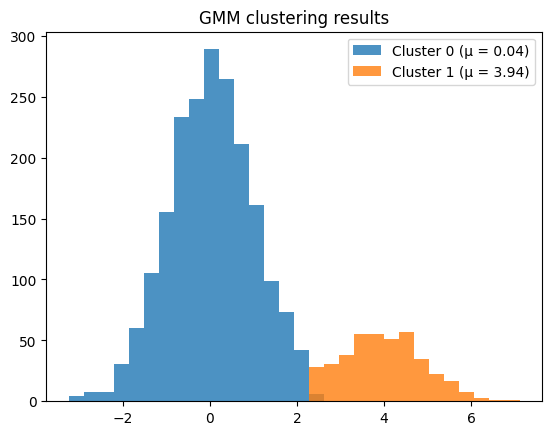

In [7]:
plt.hist(X[GMM_preds == 0], bins = bins, label = f"Cluster 0 (μ = {GMM_mean_0[0]:.2f})", alpha = 0.8)
plt.hist(X[GMM_preds == 1], bins = bins, label = f"Cluster 1 (μ = {GMM_mean_1[0]:.2f})", alpha = 0.8)
plt.title("GMM clustering results")
plt.legend()
plt.show()